In [2]:
from sklearn.preprocessing import Imputer
import numpy as np
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import KernelPCA
from sklearn import datasets,decomposition,manifold
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.utils import resample
from sklearn.datasets import load_digits
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
import scipy
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [29]:
df = pd.read_csv("/Users/Emma/Desktop/IE598 Machine Learning/MLF_GP1_CreditScore.csv")
df.head

<bound method NDFrame.head of       Sales/Revenues  Gross Margin    EBITDA  EBITDA Margin  \
0          -0.005496      0.030763  0.018885       0.024515   
1          -0.005496      0.030763  0.088716       0.094733   
2          -0.007045      0.023159  0.088716       0.096440   
3          -0.009396      0.028400  0.088716       0.099046   
4          -0.009009      0.027714  0.088716       0.098611   
5          -0.000975      0.028962  0.088716       0.089782   
6           0.007962      0.027144  0.088716       0.080115   
7           0.007962      0.027144  0.099030       0.090350   
8           0.013933      0.033939  0.099030       0.083930   
9           0.016340      0.028670  0.099030       0.081359   
10          0.021953      0.025293  0.099030       0.075424   
11          0.024457      0.022495  0.099030       0.072791   
12          0.024756      0.017352  0.165744       0.137584   
13          0.024756      0.017352  0.060702       0.035080   
14          0.018721     

feature selection

(1700, 26) (1700,)
(1275, 26) (1275,)
       Sales/Revenues  Gross Margin       EBITDA  EBITDA Margin  \
count     1700.000000   1700.000000  1700.000000    1700.000000   
mean         0.050378      0.026007     0.068718       0.021074   
std          0.161910      0.273768     0.237365       0.189025   
min         -0.661715     -0.794722    -0.782254      -0.805153   
25%         -0.005693     -0.020028    -0.022640      -0.042771   
50%          0.034000      0.003403     0.049482       0.011134   
75%          0.083004      0.025595     0.124533       0.060566   
max          2.277229      3.202713     3.542425       4.141182   

       Net Income Before Extras   Total Debt     Net Debt      LT Debt  \
count               1700.000000  1700.000000  1700.000000  1700.000000   
mean                   0.123026     0.822405    -0.419810     1.255168   
std                   14.475689    13.317075    28.385702    16.224453   
min                 -289.000000    -0.903014  -493.305578    -

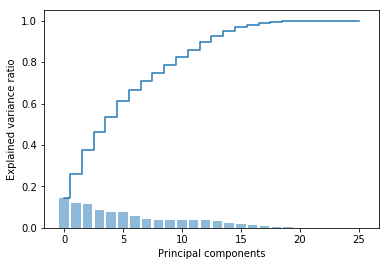

Training accuracy: 0.7694117647058824
Test accuracy: 0.7529411764705882
Training accuracy: 0.7717647058823529
Test accuracy: 0.7576470588235295
Training accuracy: 0.7741176470588236
Test accuracy: 0.7576470588235295


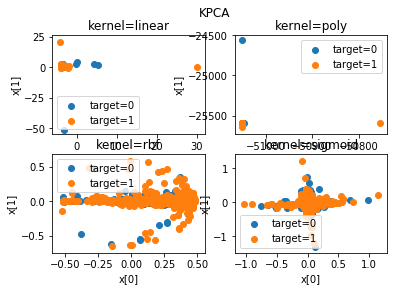

In [28]:
# Investment grid
df.isnull().any()

X, y = df.iloc[0:1700,0:26], df.InvGrd

print( X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=42)
print( X_train.shape, y_train.shape)

# Standardize the features

#scaler = preprocessing.StandardScaler().fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


#print summary of data frame
summary = X.describe()
print(summary)

print(df.head())
print(df.tail())

# Principal component analysis in scikit-learn


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)


pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_


#
#plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
#plot_decision_regions(X_train_pca, y_train, classifier=lr)
#plt.xlabel('PC 1')
#plt.ylabel('PC 2')
#plt.legend(loc='lower left')
#plt.show()


pca.explained_variance_ratio_.shape      

plt.bar(range(0, 26), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(0, 26), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()





pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression(penalty='l1')
lr.fit(X_train_pca,y_train)

print('Training accuracy:', lr.score(X_train_pca, y_train))
print('Test accuracy:', lr.score(X_test_pca, y_test))

#y_train_pred = pca.predict(X_train_pca)
#print( metrics.accuracy_score(y_train, y_train_pred) )


#feat_labels = df[0:]
#
#importances = lr.feature_importances_
#indices = np.argsort(importances)[::-1]
#for f in range(X_train.shape[1]):
#    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
#plt.title('Feature Importance')
#plt.bar(range(X_train.shape[1]), importances[indices], align='center')
#plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
#plt.xlim([-1, X_train.shape[1]])
#plt.tight_layout()
#plt.show()




# ## LDA via scikit-learn




lda = LDA()
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

#lda.explained_variance_ratio_.shape      
#
#plt.bar(range(0, 26), lda.explained_variance_ratio_, alpha=0.5, align='center')
#plt.step(range(0, 26), np.cumsum(lda.explained_variance_ratio_), where='mid')
#plt.ylabel('Explained variance ratio')
#plt.xlabel('Principal components')
#
#plt.show()

lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)
print('Training accuracy:', lr.score(X_train_lda, y_train))
print('Test accuracy:', lr.score(X_test_lda, y_test))




#plot_decision_regions(X_train_lda, y_train, classifier=lr)
#plt.xlabel('LD 1')
#plt.ylabel('LD 2')
#plt.legend(loc='lower left')
#plt.tight_layout()
#plt.show()
#
#
#plot_decision_regions(X_test_lda, y_test, classifier=lr)
#plt.xlabel('LD 1')
#plt.ylabel('LD 2')
#plt.legend(loc='lower left')
#plt.tight_layout()
#plt.show()



# ## Kernel principal component analysis in scikit-learn

kpca = KernelPCA(n_components=15, kernel='sigmoid', gamma=10)
X_train_kpca = kpca.fit_transform(X_train_std, y_train)
X_test_kpca = kpca.transform(X_test_std)

lr = LogisticRegression()
lr = lr.fit(X_train_kpca, y_train)
print('Training accuracy:', lr.score(X_train_kpca, y_train))
print('Test accuracy:', lr.score(X_test_kpca, y_test))



decomposition.IncrementalPCA

def plot_KPCA(*data):
    X,y = data
    kernels = ['linear','poly','rbf','sigmoid']
    fig = plt.figure()

    for i,kernel in enumerate(kernels):
        kpca = decomposition.KernelPCA(n_components=15, kernel=kernel)
        kpca.fit(X_train)
        X_r = kpca.transform(X_train_std)
        ax = fig.add_subplot(2, 2, i+1)
        for label in np.unique(y):
            position = y_train == label
            ax.scatter(X_r[position,0],X_r[position,1],label="target=%d"%label)
            ax.set_xlabel('x[0]')
            ax.set_ylabel('x[1]')
            ax.legend(loc='best')
            ax.set_title('kernel=%s'% kernel)
    plt.suptitle("KPCA")
    plt.show()
plot_KPCA(X_train, y_train)


Decision tree classifier

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini',random_state=1)

tree.fit(X_train_pca, y_train)

print('Test Accuracy: %.3f' % tree.score(X_test_pca, y_test))
print('Train Accuracy: %.3f' % tree.score(X_train_pca, y_train))


Test Accuracy: 0.751
Train Accuracy: 1.000


In [37]:
param_range = np.arange(1,20)
param_grid = {"max_depth": param_range}

gs = GridSearchCV(estimator=tree,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=-1)

gs = gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

clf = gs.best_estimator_
clf.fit(X_train, y_train)

print('Test accuracy: %.3f' % clf.score(X_test, y_test))

0.7952941176470588
{'max_depth': 16}
Test accuracy: 0.793


out of sample accuracy improvement not very significant

(1700, 26) (1700,)
(1275, 26) (1275,)


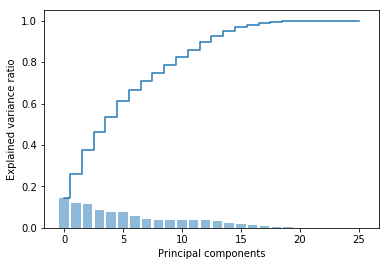

Training accuracy: 1.0
Test accuracy: 0.27058823529411763
Training accuracy: 1.0
Test accuracy: 0.2564705882352941
Training accuracy: 1.0
Test accuracy: 0.24941176470588236


In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Investment grid
df.isnull().any()

X, y = df.iloc[0:1700,0:26], df.Rating

print( X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=42)
print( X_train.shape, y_train.shape)

# Standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)


pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_


#
#plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
#plot_decision_regions(X_train_pca, y_train, classifier=lr)
#plt.xlabel('PC 1')
#plt.ylabel('PC 2')
#plt.legend(loc='lower left')
#plt.show()


pca.explained_variance_ratio_.shape      

plt.bar(range(0, 26), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(0, 26), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()





pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

tree = DecisionTreeClassifier(criterion='gini',random_state=1)

tree.fit(X_train_pca, y_train)

print('Training accuracy:', tree.score(X_train_pca, y_train))
print('Test accuracy:', tree.score(X_test_pca, y_test))


#feat_labels = df[0:]
#
#importances = lr.feature_importances_
#indices = np.argsort(importances)[::-1]
#for f in range(X_train.shape[1]):
#    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
#plt.title('Feature Importance')
#plt.bar(range(X_train.shape[1]), importances[indices], align='center')
#plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
#plt.xlim([-1, X_train.shape[1]])
#plt.tight_layout()
#plt.show()




# ## LDA via scikit-learn
lda = LDA()
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

#lda.explained_variance_ratio_.shape      
#
#plt.bar(range(0, 26), lda.explained_variance_ratio_, alpha=0.5, align='center')
#plt.step(range(0, 26), np.cumsum(lda.explained_variance_ratio_), where='mid')
#plt.ylabel('Explained variance ratio')
#plt.xlabel('Principal components')
#
#plt.show()

tree = DecisionTreeClassifier(criterion='gini',random_state=1)
tree.fit(X_train_lda, y_train)

print('Training accuracy:', tree.score(X_train_lda, y_train))
print('Test accuracy:', tree.score(X_test_lda, y_test))





#plot_decision_regions(X_train_lda, y_train, classifier=lr)
#plt.xlabel('LD 1')
#plt.ylabel('LD 2')
#plt.legend(loc='lower left')
#plt.tight_layout()
#plt.show()
#
#
#plot_decision_regions(X_test_lda, y_test, classifier=lr)
#plt.xlabel('LD 1')
#plt.ylabel('LD 2')
#plt.legend(loc='lower left')
#plt.tight_layout()
#plt.show()



# ## Kernel principal component analysis in scikit-learn

kpca = KernelPCA(n_components=15, kernel='sigmoid', gamma=10)
X_train_kpca = kpca.fit_transform(X_train_std, y_train)
X_test_kpca = kpca.transform(X_test_std)

tree = DecisionTreeClassifier(criterion='gini',random_state=1)

tree.fit(X_train_kpca, y_train)

print('Training accuracy:', tree.score(X_train_kpca, y_train))
print('Test accuracy:', tree.score(X_test_kpca, y_test))




In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='gini',random_state=1)

tree.fit(X_train_pca, y_train)

print('Test Accuracy: %.3f' % tree.score(X_test_pca, y_test))
print('Train Accuracy: %.3f' % tree.score(X_train_pca, y_train))

param_range = np.arange(1,20)
param_grid = {"max_depth": param_range}

gs = GridSearchCV(estimator=tree,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=10,
                  n_jobs=-1)

gs = gs.fit(X_train_pca, y_train)

print(gs.best_score_)
print(gs.best_params_)

clf = gs.best_estimator_
clf.fit(X_train_pca, y_train)

print('Test accuracy: %.3f' % clf.score(X_test_pca, y_test))

Test Accuracy: 0.271
Train Accuracy: 1.000


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.2847058823529412
{'max_depth': 19}
Test accuracy: 0.282


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


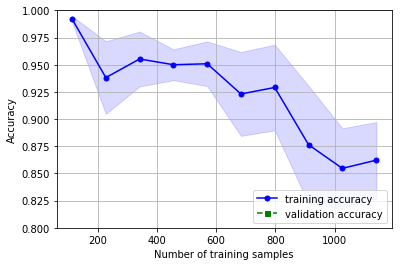

In [59]:
#debug the model
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

tree = DecisionTreeClassifier(criterion='gini', max_depth = 14, random_state=1)

train_sizes, train_scores, test_scores = learning_curve(estimator=tree,
                                                        X=X_train_pca,
                                                        y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=10,
                                                        n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, 
         train_mean, 
         color='blue', 
         marker='o',
         markersize=5, 
         label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, 
                 color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()